<a href="https://colab.research.google.com/github/XingruiWang/Animefy/blob/master/Notebook/Animefy-yourself-new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animefy yourself!

A markdown introduction is [here](https://github.com/XingruiWang/Animefy/blob/master/README.md), which include the detailed description and code.

<img src="https://raw.githubusercontent.com/XingruiWang/Animefy/master/example/example.png" alt="example" style="width: 100%;" />


### 1: About

A "selfie2anime" project based on StyleGAN2. You can generate your own animate faces base on real-world selfie. The whole "selfie2anime" project is based on StyleGAN2\[[Official code](https://github.com/NVlabs/stylegan2)\]\[[paper](https://arxiv.org/abs/1912.04958)\]\[[video](https://youtu.be/c-NJtV9Jvp0)\]and layer swapping technique proposed by [Justin Pinkney](https://www.justinpinkney.com/). And also thanks for the highly reproduceable Pytorch reimplementing styleGAN2 project by [Tetratrio](https://github.com/Tetratrio/stylegan2_pytorch) .


Folder tree:

```
Animefy
│  README.md -------------------------------- Description of the projects.
│  latent.sh -------------------------------- The script to find latent feature of a given image.
│  run.sh ----------------------------------- The script to train the model.
│  synthesis.sh ----------------------------- The script to generate animate image without condition.
│  align_images.py -------------------------- Align the face of given images, since the given selfie image might not in the same scale.
│  blend.py --------------------------------- Blend the model after well trained.
│  generate.py ------------------------------ Generate animate image based on the latent code.
│  run_convert_from_tf.py ------------------- Convert pretrained model file in tensorflow to pytorch.
│  run_generator.py ------------------------- Generate animte images without condition (i.e. latent code), called by `synthesis.sh`.
│  run_metrics.py --------------------------- Caculate the metric of trained model.
│  run_projector.py ------------------------- Find latent feature of a given image, called by `latent.sh`.
│  run_training.py -------------------------- Train the model, called by `run.sh`.
│  requirements.txt ------------------------- Environment required, can be set up using `pip install -r requirements.txt`.
│  settings_with_pretrain.yaml -------------- Configuration when training the model.
│
├─environment
│      anime.yaml
│
├─example
│      example.png ------------------------- Example image of the process of finding latent code and generate corresponding anime image by interating.
│
├─Notebook
│      Animefy-yourself.ipynb -------------- Description notebook of the project.
│
├─projects
│  │  resize.py ---------------------------- Might be useless now, resize the selfie image to 512 × 512.
│  │
│  └─latent
│          image0000-target.png
│
└─stylegan2 -------------------------------- Core files.
    │  loss_fns.py ------------------------- Loss function.
    │  models.py --------------------------- StyleGAN2 model file
    │  modules.py -------------------------- Dependence module of StyleGAN2.
    │  project.py -------------------------- Find the latent code.
    │  train.py ---------------------------- Define class `Trainer` to train the model.
    │  utils.py ---------------------------- Utility file of model and training.
    │  __init__.py ------------------------- Using for importing.
    │
    ├─external_models
    │      inception.py -------------------- Inception module.
    │      lpips.py ------------------------ Caculate the similarity between images.
    │      __init__.py
    │
    └─metrics ------------------------------ Metric file.
            fid.py ------------------------- Fréchet Inception Distance。
            ppl.py ------------------------- Perplexity.
            __init__.py -------------------- Using for importing.

```


### 3. Train the model

#### 3.1. Dataset

The animate faces datast we used is [here](http://www.seeprettyface.com/mydataset_page3.html#anime)，this dataset is processed from [DANBOORU2018](https://www.gwern.net/Danbooru2020#danbooru2018). The dataset contains 140000 animate faces.[[Baidu Drive](https://pan.baidu.com/share/init?surl=8pHjzcOWhVF2u6LKOlT3yg) (code：JIMD)]

#### 3.2. Installation

1. Clone from github：

In [4]:
!git clone https://github.com/XingruiWang/Animefy.git
%cd Animefy

[WinError 2] The system cannot find the file specified: 'Animefy'
C:\Users\kashi


'git' is not recognized as an internal or external command,
operable program or batch file.


2. Dependencies（finish in command line）

```bash
conda env create -f environment/anime.yaml
conda activate anime
pip install -r requirements.txt
```

#### 3.3. Training

(Due to the size of origin dataset, I use sample data here. If your want to train on the original data, please download it first)

- Download pretrain model on FFHQ `./G_pretrain.pth` ([google drive](https://drive.google.com/uc?id=19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR))

In [1]:
# !gdown --id 19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR

import gdown

# Replace the URL with the Google Drive file's link
url = 'https://drive.google.com/uc?id=19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR'
output = 'G_pretrain.pth'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR
From (redirected): https://drive.google.com/uc?id=19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR&confirm=t&uuid=259c72a0-8cfc-40ee-9c41-0979e2c757cf
To: d:\KASHISH\VIT\Sem7\major Project\Animefy\Notebook\G_pretrain.pth
100%|██████████| 121M/121M [00:36<00:00, 3.35MB/s] 


'G_pretrain.pth'

- Train by running

In [3]:
!python run_training.py settings.yaml

Traceback (most recent call last):
  File "run_training.py", line 1010, in <module>
    main()
  File "run_training.py", line 1005, in main
    run(args)
  File "run_training.py", line 973, in run
    trainer = get_trainer(args)
  File "run_training.py", line 882, in get_trainer
    master_port=args.master_port
  File "/content/Animefy/stylegan2/train.py", line 232, in __init__
    self.G = G.train().to(self.device)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 673, in to
    return self._apply(convert)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 387, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 387, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 387, in _apply
    module._apply(fn)
  [Previous line repeated 1 more time]
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules

or running in script `run.sh`

```bash
sh run.sh
```

* Here `settings.yaml` store the configuration of training. If you want to train it again, set `data_dir` to your own animate face data. And you can set `g_file` and `d_file` if your are loading the pretrain model.

```yaml
# Here is an example training config file for 512x512 images.
channels: [32, 64, 128, 256, 512, 512, 512, 512]
tensorboard_log_dir: 'runs/stylegan2_512x512'
tensorboard_image_interval: 20
checkpoint_dir: 'checkpoints/stylegan2_512x512'
checkpoint_interval: 500
data_dir: data/anime_face
output_dir: train_output
gpu: [0, 1, 2, 3]
g_file: G_pretrain.pth
iterations: 10000

```

* For the first time of training, I set `G_file` to the pretrain model of FFHQ face data, while `D_file` is not compulsory.

- I train the model on 4 GPUs (Titan V)，for around 20,000 iteration (not epochs) and 2 days in total. 

- You can download my pretrain model `./G_out.pth` ([google drive](https://drive.google.com/file/d/1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk/view?usp=sharing))

In [9]:
# !gdown --id 1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk

import gdown

# Replace the URL with the Google Drive file's link
url = 'https://drive.google.com/uc?id=1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk'
output = 'G_out.pth'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk
From (redirected): https://drive.google.com/uc?id=1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk&confirm=t&uuid=2a4b31a1-859b-42b7-8afa-0014bb81fda4
To: d:\KASHISH\VIT\Sem7\major Project\Animefy\Notebook\G_out.pth
100%|██████████| 121M/121M [00:41<00:00, 2.93MB/s]


'G_out.pth'

### Layer Swapping

- The trained model is not enough to generate custom animate faces. Inspired by  [Justin Pinkney](https://www.justinpinkney.com/), we blended the human faces generating model and our animate faces generating model in order to keep the low resolution information of real world human face (gesture, head position and angle) and high resolution information (big eyes, small nose, hair style and etc. ) of animate faces. 

- I reimplement the [blend_models.py](https://github.com/justinpinkney/stylegan2/blob/master/blend_models.py) by pytorch ([here](https://github.com/XingruiWang/Animefy/blob/master/blend.py))


In [ ]:
from blend import blend_models

G_out = blend_models("G_pretrain.pth", 
                     "G_out.pth", 
                     8, None)
G_out.save('G_blend.pth')

### Generate your animate faces！

In [2]:
%mkdir raw
%mkdir latent
%mkdir aligned

1. Put your photo in the folder `raw`.

Here I use a sample images.

In [11]:
# !wget https://upload.wikimedia.org/wikipedia/commons/6/6d/Shinz%C5%8D_Abe_Official.jpg -O raw/example.jpg
%pwd
import requests

# url = "http://www.seeprettyface.com/images/female_example.png"
url = "https://cdn.pixabay.com/photo/2016/01/10/22/07/woman-1132617_1280.jpg"
response = requests.get(url)
with open("raw/example2.jpg", "wb") as file:
    file.write(response.content)

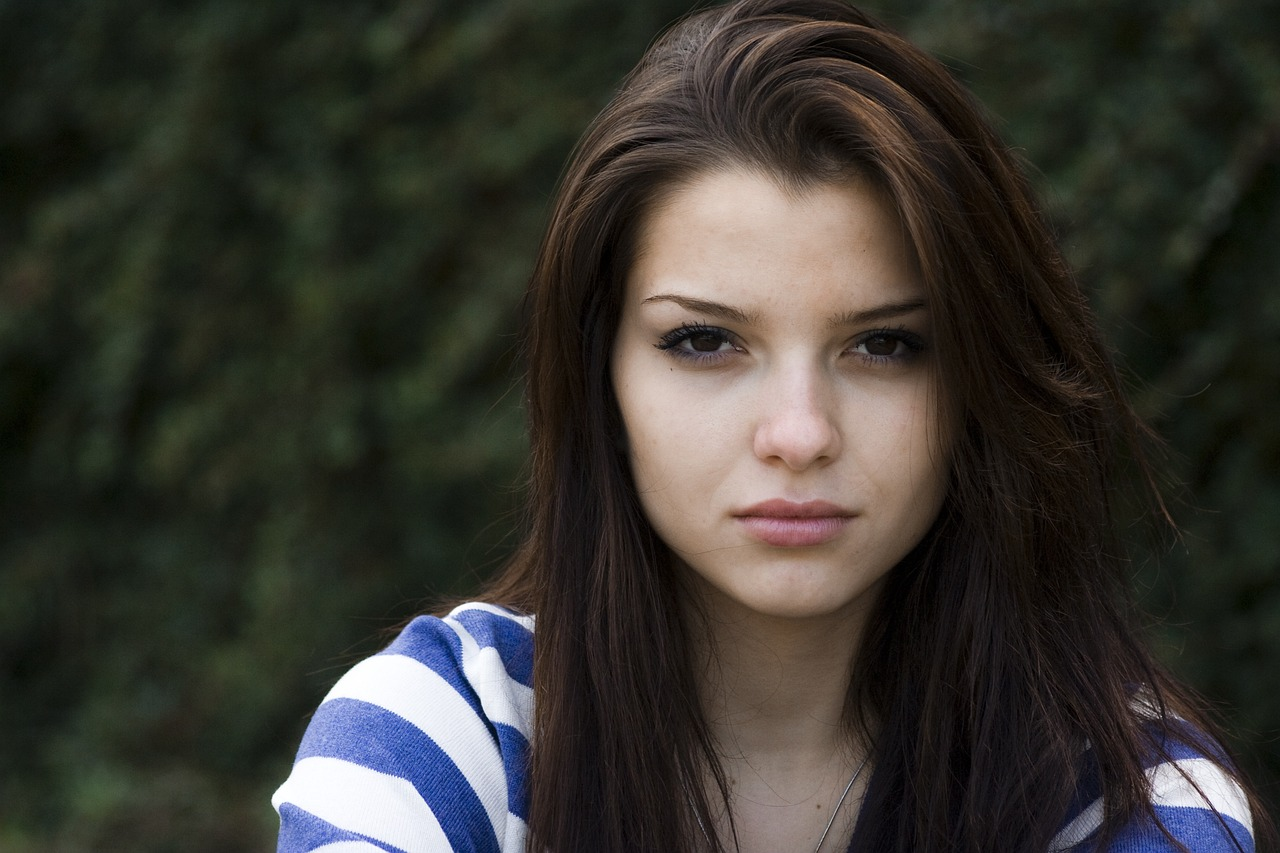

In [12]:
# %cd ..
from IPython.display import Image
Image(filename='raw/example2.jpg') 

2. Face alignment

In [13]:
!python align_images.py raw aligned

2024-11-13 14:32:38.696557: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


2024-11-13 14:32:48.210097: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
C:\Users\kashi\AppData\Roaming\Python\Python312\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


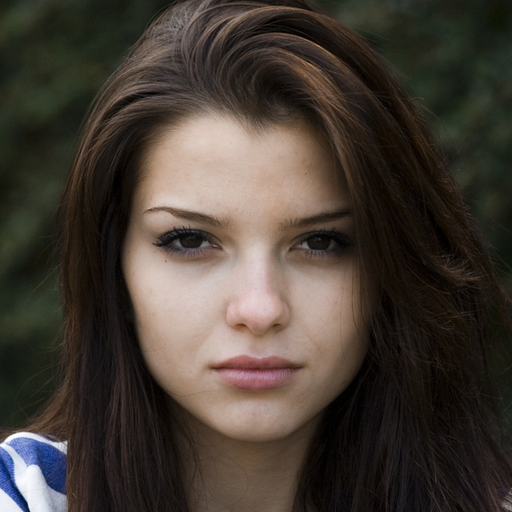

In [15]:
Image(filename='aligned/example_02.png') 

In [2]:
import torch
print(torch.version.cuda)
print(torch.__version__)
print(torch.cuda.is_available())

import os
print(os.getenv("CUDA_HOME"))
%cd ..


11.8
2.2.1+cu118
True
None
d:\KASHISH\VIT\Sem7\major Project\Animefy


C:\Users\kashi\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


3. Feature projection

In [3]:
!python run_projector.py project_real_images --network=G_pretrain.pth --data_dir=aligned/test/ --output=latent/ --num_steps=400 --gpu=0

Loading images from "aligned/test/"...

2024-11-13 14:36:35.889686: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 14:36:37.944224: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
C:\Users\kashi\AppData\Roaming\Python\Python312\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
C:\Users\kashi\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: User


Done!

  0%|          | 0/10 [00:00<?, ?it/s]
                                      


Gathering dlatents...

 10%|█         | 1/10 [00:00<00:07,  1.27it/s]
                                              


Done!

100%|██████████| 10/10 [00:00<00:00, 11.32it/s]
;;;;;;;;;;;;;;;;;;;;;;;;;;;

  0%|          | 0/400 [00:00<?, ?it/s]
                                       


Projecting image(s) 1/1
loss: 1.63e+06, lpips_distance: 0.6339, lr: 0
noise_reg: 16.3

  0%|          | 1/400 [00:02<15:16,  2.30s/it]
                                               


Projecting image(s) 1/1
loss: 1.629e+06, lpips_distance: 0.6349, lr: 0.005
noise_reg: 16.29

  0%|          | 2/400 [00:02<07:28,  1.13s/it]
                                               


Projecting image(s) 1/1
loss: 1.628e+06, lpips_distance: 0.6336, lr: 0.01
noise_reg: 16.28

  1%|          | 3/400 [00:02<04:56,  1.34it/s]
                                               


Projecting image(s) 1/1
loss: 1.628e+06, lpips_distance: 0.63

4. Gererate the image!

In [4]:
# import os
# import numpy as np
# import torch
# import stylegan2
# from stylegan2 import utils
# import cv2 as cv
# from google.colab.patches import cv2_imshow
# from tqdm import tqdm
# dir = 'latent'

# G_blend = 'G_blend.pth'
# # G_blend = 'Gs.pth'

# def synthesis(G_file, latent_file):
#     device = torch.device(0)
#     G = stylegan2.models.load(G_file).G_synthesis 
#     latent = np.load(latent_file, allow_pickle=True)
#     G.to(device)
#     latent = torch.tensor(latent[np.newaxis, ...]).to(device)
#     out = G(latent)
#     out = utils.tensor_to_PIL(out, pixel_min=-1, pixel_max=1)[0]
#     return out

# for l in tqdm(sorted(os.listdir(dir))):
#   if l[-3:] != 'npy':
#     continue
#   latent = os.path.join(dir, l)
#   out = synthesis(G_blend, latent)
#   print(l)
#   display(out)

# out.save('output.png')


import os
import numpy as np
import torch
import stylegan2
from stylegan2 import utils
import cv2 as cv
from tqdm import tqdm
from PIL import Image  # To handle image display and saving

dir = 'latent'
G_blend = 'G_blend.pth'
# G_blend = 'Gs.pth'

def synthesis(G_file, latent_file):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    G = stylegan2.models.load(G_file).G_synthesis 
    latent = np.load(latent_file, allow_pickle=True)
    G.to(device)
    latent = torch.tensor(latent[np.newaxis, ...]).to(device)
    out = G(latent)
    out = utils.tensor_to_PIL(out, pixel_min=-1, pixel_max=1)[0]
    return out

# Ensure output directory exists
output_dir = 'output_images'
os.makedirs(output_dir, exist_ok=True)

# Iterate through latent files and process each
for l in tqdm(sorted(os.listdir(dir))):
    if l[-3:] != 'npy':
        continue
    latent = os.path.join(dir, l)
    out = synthesis(G_blend, latent)
    print(f"Processing file: {l}")
    
    # Show image using OpenCV
    out_cv = np.array(out)[:, :, ::-1]  # Convert PIL image to OpenCV format (BGR)
    cv.imshow("Generated Image", out_cv)
    cv.waitKey(0)  # Display until a key is pressed
    cv.destroyAllWindows()
    
    # Save image
    output_path = os.path.join(output_dir, f"{os.path.splitext(l)[0]}.png")
    out.save(output_path)
    print(f"Saved generated image to {output_path}")



C:\Users\kashi\AppData\Roaming\Python\Python312\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
  0%|          | 0/6 [00:00<?, ?it/s]

Processing file: image0000-step0081.npy


 17%|█▋        | 1/6 [00:29<02:25, 29.19s/it]

Saved generated image to output_images\image0000-step0081.png
Processing file: image0000-step0161.npy


 33%|███▎      | 2/6 [00:39<01:12, 18.20s/it]

Saved generated image to output_images\image0000-step0161.png
Processing file: image0000-step0241.npy


 50%|█████     | 3/6 [00:44<00:35, 11.98s/it]

Saved generated image to output_images\image0000-step0241.png
Processing file: image0000-step0321.npy


 67%|██████▋   | 4/6 [00:51<00:20, 10.14s/it]

Saved generated image to output_images\image0000-step0321.png
Processing file: image0000-step0400.npy


100%|██████████| 6/6 [01:08<00:00, 11.50s/it]

Saved generated image to output_images\image0000-step0400.png
